# Analysis traffic dataset

## Case 2: Traffic density near Helsinki

![snapshot_Helsinki.png](https://github.com/TUDelft-MUDE/source-files/raw/main/file/helsinki_highway.png)
*Openstreetmap screenshot of the location of the measurement station from which this data has been sourced. Map data © [OpenStreetMap contributors](https://www.openstreetmap.org/copyright), licensed under [ODbL](https://opendatacommons.org/licenses/odbl/1-0/).*

**What's the propagated uncertainty? *How large is the traffic density?***

In this project, you have chosen to work on the traffic density on a highway close to Helsinki, Finland. You have observations of the flow of vehicles $F$ [#/h] and their average velocity $v$ [km/h]. The dataset has been accessed [here](https://www.digitraffic.fi/). In this exercise, we want to compute the density of traffic $D$ [#/km] along this path in both directions:

$$
D = \frac{F}{v}
$$

**The goal of this project is:**
1. Choose a reasonable distribution function for $F$ and $v$.
2. Fit the chosen distributions to the observations of $F$ and $v$.
3. Assuming $F$ and $v$ are independent, propagate their distributions to obtain a distribution for the traffic density $D$.
4. Analyze the distribution of $D$.

## Importing packages

In [1]:
import numpy as np              # For math
import matplotlib.pyplot as plt # For plotting
from scipy import stats         # For math
from math import ceil, trunc    # For plotting

# This is just cosmetic - it updates the font size for our plots
plt.rcParams.update({'font.size': 14})

## 1. Explore the data

The first step in the analysis is exploring the data, visually and through statistics. 

Tip: In the workshop files, you have used the pandas `.describe()` function to obtain the statistics of a data vector. `scipy.stats` has a similar function.

In [2]:
import os
from urllib.request import urlretrieve

def findfile(fname):
    if not os.path.isfile(fname):
        print(f"Downloading {fname}...")
        urlretrieve('https://github.com/TUDelft-MUDE/source-files/raw/main/file/GA1.4/'+fname, fname)

findfile('dataset_traffic.csv')

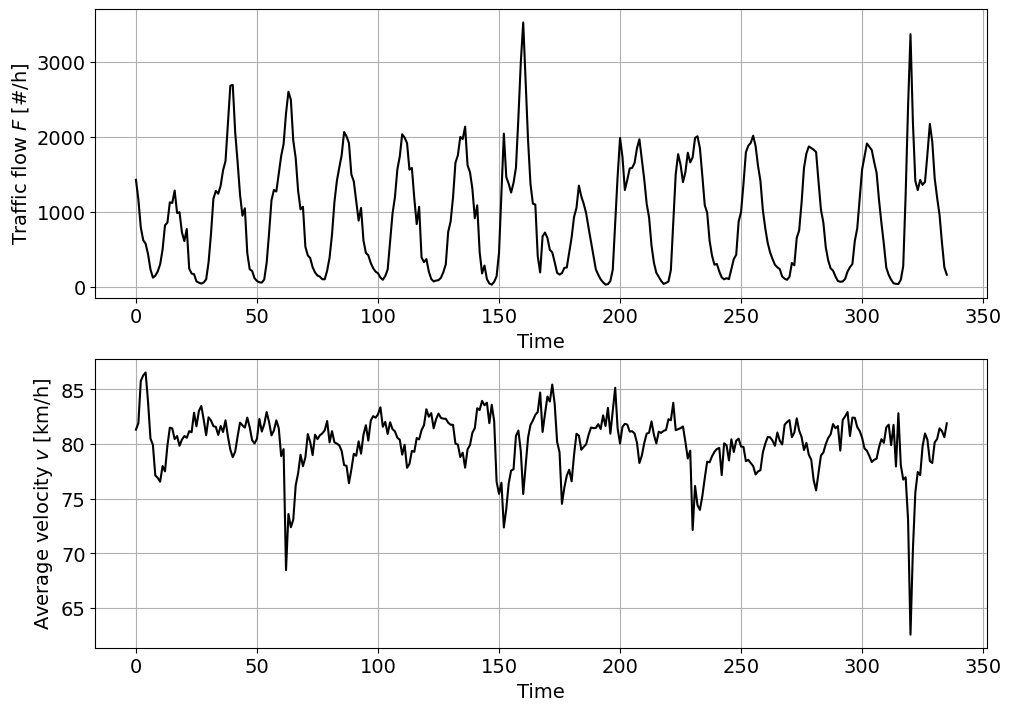

In [3]:
# Import the data from the .csv file
F, v = np.genfromtxt('dataset_traffic.csv', delimiter=",", unpack=True, skip_header=True)

# Plot the time series for the number of heavy vehicles H
fig, ax = plt.subplots(2, 1, figsize=(10, 7), layout = 'constrained')
ax[0].plot(F,'k')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Traffic flow $F$ [#/h]')
ax[0].grid()

# Plot the time series for the number of cars C
ax[1].plot(v,'k')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Average velocity $v$ [km/h]')
ax[1].grid()

In [4]:
# Statistics for F
print(stats.describe(F))

DescribeResult(nobs=np.int64(336), minmax=(np.float64(32.0), np.float64(3521.0)), mean=np.float64(923.6547619047619), variance=np.float64(531318.2983653162), skewness=np.float64(0.6103028080051134), kurtosis=np.float64(-0.31760155231002685))


In [5]:
# Statistics for v
print(stats.describe(v))

DescribeResult(nobs=np.int64(336), minmax=(np.float64(62.56077265973254), np.float64(86.55652173913043)), mean=np.float64(80.14046277907177), variance=np.float64(6.839493618504111), skewness=np.float64(-1.7486270311230472), kurtosis=np.float64(7.384772010781695))


<div style="background-color:#AABAB2; color: black; width:90%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

** Task 1: ** 

Describe the data based on the previous statistics:
- Which variable features a higher variability? Also consider the magnitudes of the different variables.
- What does the skewness coefficient represent? Which kind of distribution functions should we consider to fit based on this coefficient?
  
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- $F$ features a higher mean but also a significantly higher variance. To compare the variability of variables with different magnitudes, it can be useful to compute the <b>coefficient of variation</b>, which normalizes the standard deviation against the mean. If we do so, we obtain $CV(F)=\sigma/\mu=\sqrt{531318.298}/923.655 = 0.789$ and $CV(v)=\sigma/\mu = \sqrt{6.839}/80.140 = 0.033$. Thus, $F$ has far higher variability than $v$.
- $F$ has a weak positive skewness, and $v$ has negative skewness. An appropriate distribution for $F$ might be one that features a right tail, such as a right-tailed Gumbel, beta, exponential, or lognormal distribution. For $v$, we might want to consider a left-tailed distribution, for example a beta or left-tailed Gumbel distribution.
</div>

## 2. Empirical distribution functions

Now, we are going to compute and plot the empirical PDF and CDF for each variable. Note that you have the pseudo-code for the empirical CDF in the [reader](https://mude.citg.tudelft.nl/book/2025/univariate_distributions/empirical.html).

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>  
 
Define a function to compute the empirical CDF. Plot your empirical PDF and CDF.
</p>
</div>

In [6]:
def ecdf(observations):
    """Write a function that returns [non_exceedance_probabilities, sorted_values]."""
    sorted_values = np.sort(observations)
    n = sorted_values.size
    non_exceedance_probabilities = np.arange(1, n+1) / (n + 1)
    return [non_exceedance_probabilities, sorted_values]

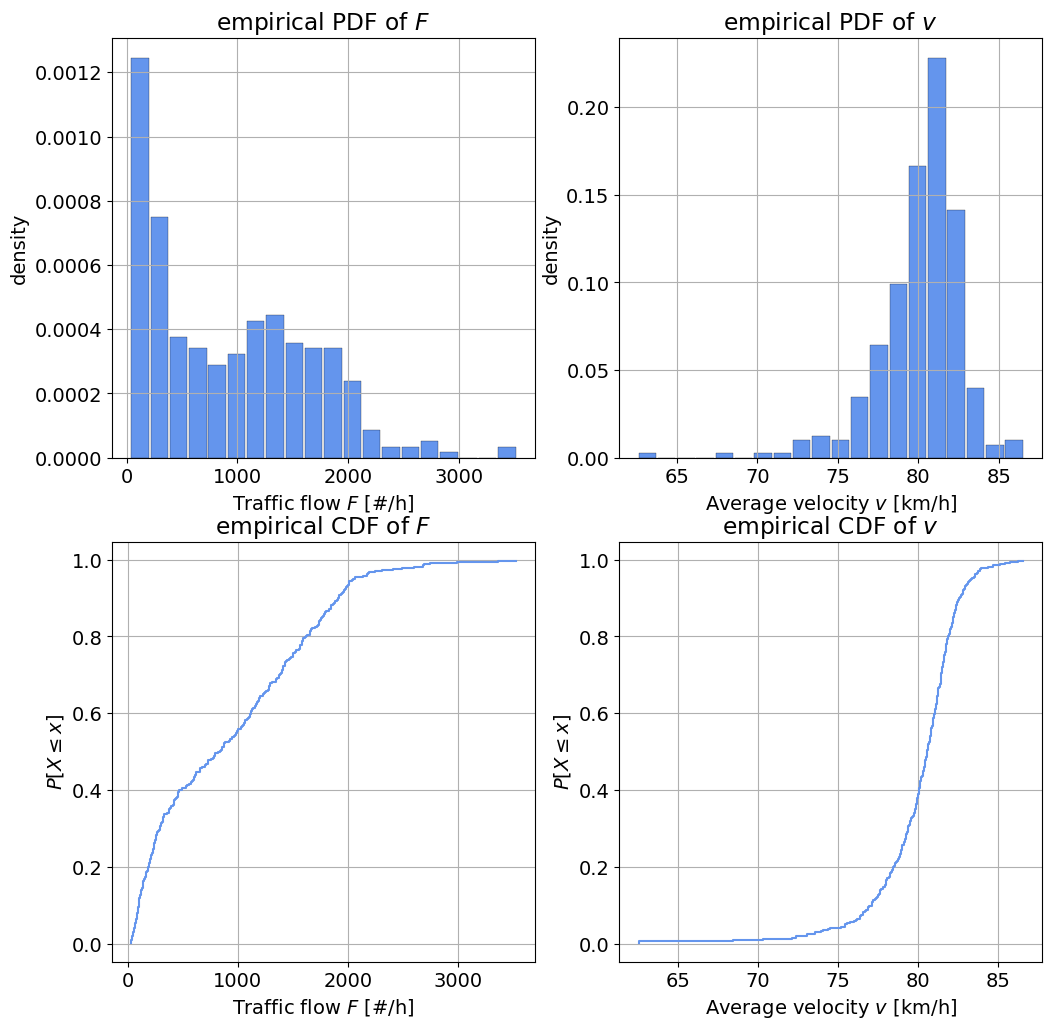

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the PDF of F
axes[0,0].hist(F, edgecolor='k', linewidth=0.2, rwidth = 0.9, color='cornflowerblue', density = True, bins = 20)
axes[0,0].set_xlabel('Traffic flow $F$ [#/h]')
axes[0,0].set_ylabel('density')
axes[0,0].set_title('empirical PDF of $F$')
axes[0,0].grid()

# Plot the PDF of v
axes[0,1].hist(v, edgecolor='k', linewidth=0.2, rwidth = 0.9,color='cornflowerblue', density = True, bins = 20)
axes[0,1].set_xlabel('Average velocity $v$ [km/h]')
axes[0,1].set_ylabel('density')
axes[0,1].set_title('empirical PDF of $v$')
axes[0,1].grid()

# Plot the empirical CDF of F
axes[1,0].step(ecdf(F)[1], ecdf(F)[0], color='cornflowerblue')
axes[1,0].set_xlabel('Traffic flow $F$ [#/h]')
axes[1,0].set_ylabel(r'${P[X \leq x]}$')
axes[1,0].set_title('empirical CDF of $F$')
axes[1,0].grid()

# Plot the empirical CDF of v
axes[1,1].step(ecdf(v)[1], ecdf(v)[0], color='cornflowerblue')
axes[1,1].set_xlabel('Average velocity $v$ [km/h]')
axes[1,1].set_ylabel(r'${P[X \leq x]}$')
axes[1,1].set_title('empirical CDF of $v$')
axes[1,1].grid()

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b>   

Based on the results of Task 1 and the empirical PDF and CDF, select <b>one</b> distribution to fit to each variable. 
- For $F$, select between an exponential or lognormal distribution.
- For $v$ choose between a Gaussian and Gumbel distribution.

</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

$F$: exponential, although any fit is horrible. Perkele. - Reason: the distribution has strong positive skewness, indicating a right tail, and mean of the distribution is very close to the left bound.

$v$: left-tailed Gumbel - Reason: the distribution has a negative skewness, so a symmetric distribution like a Gaussian would not be a good fit. The left-tailed Gumbel distribution fits our needs better.
</div>

## 3. Fitting a distribution

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4:</b>  
 
Fit the selected distributions to the observations using MLE (Maximum Likelihood Estimation).
</p>
</div>

Hint: Use [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html)'s built-in functions (be careful with the parameter definitions!).

In [8]:
params_F = stats.expon.fit(F)
params_v = stats.gumbel_l.fit(v)

print(params_F)

(32.0, 891.6547619047619)


## 4. Assessing goodness of fit

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>  
 
Assess the goodness of fit of the selected distribution using:
- One graphical method: QQplot or Logscale. Choose one.
- The Kolmogorov-Smirnov test.
</p>
</div>

Hint: The Kolmogorov-Smirnov test is implemented in [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html).

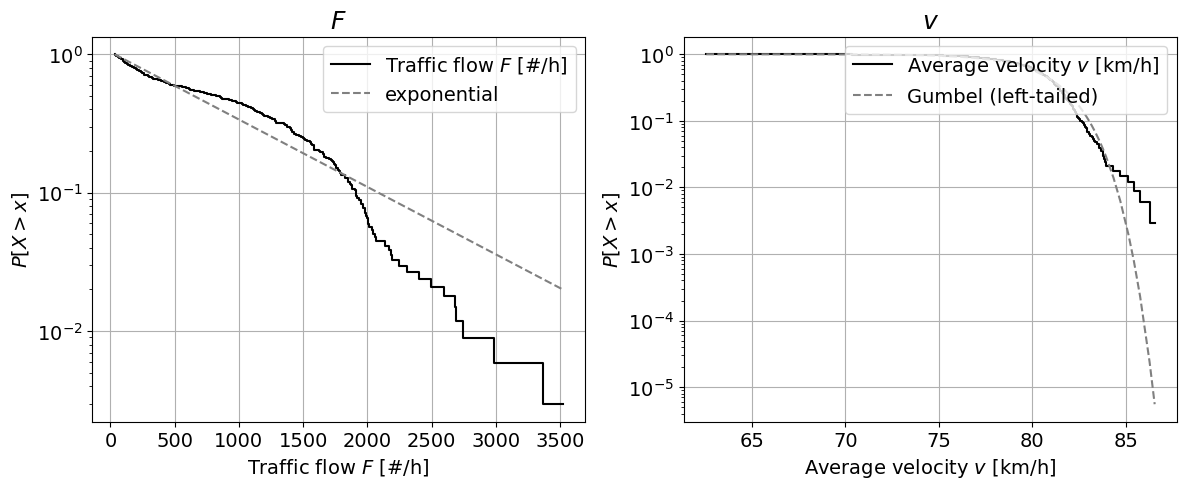

In [9]:
# Graphical method

# Logscale
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].step(ecdf(F)[1], 1-ecdf(F)[0], 
             color='k', label='Traffic flow $F$ [#/h]')
axes[0].plot(ecdf(F)[1], 1-stats.expon.cdf(ecdf(F)[1], *params_F), '--', color = 'grey', label='exponential')
axes[0].set_xlabel('Traffic flow $F$ [#/h]')
axes[0].set_ylabel('${P[X > x]}$')
axes[0].set_title('$F$', fontsize=18)
axes[0].set_yscale('log')
axes[0].legend(loc = "upper right")
axes[0].grid()

axes[1].step(ecdf(v)[1], 1-ecdf(v)[0], 
             color='k', label='Average velocity $v$ [km/h]')
axes[1].plot(ecdf(v)[1], 1-stats.gumbel_l.cdf(ecdf(v)[1], *params_v),
             '--', color = 'grey', label='Gumbel (left-tailed)')
axes[1].set_xlabel('Average velocity $v$ [km/h]')
axes[1].set_ylabel('${P[X > x]}$')
axes[1].set_title('$v$', fontsize=18)
axes[1].set_yscale('log')
axes[1].legend(loc = "upper right")
axes[1].grid()

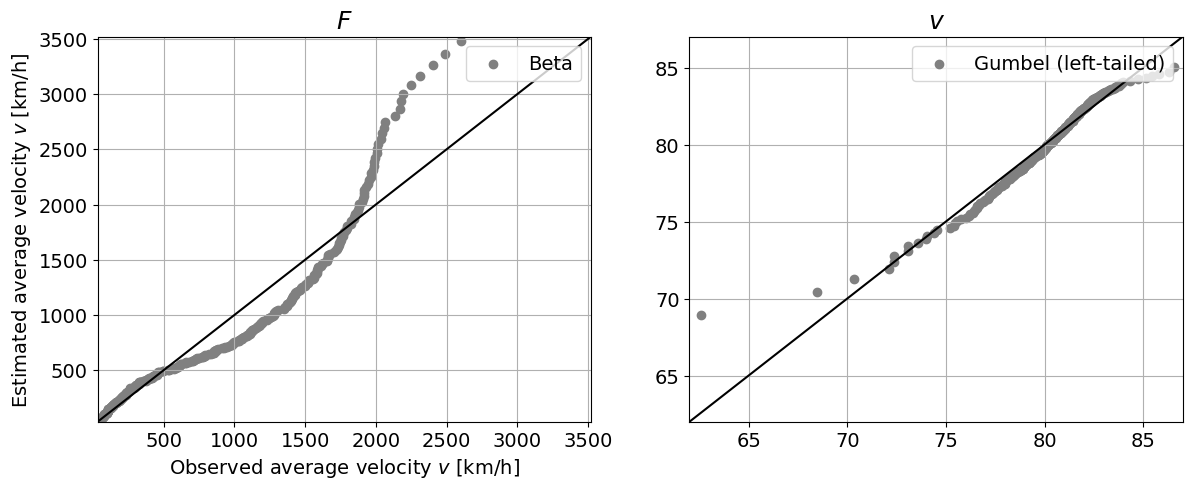

In [10]:
# QQ plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot([trunc(min(F)), ceil(max(F))], [trunc(min(F)), ceil(max(F))], 'k')
axes[0].scatter(ecdf(F)[1], stats.expon.ppf(ecdf(F)[0], *params_F), color='grey', label='Beta')
axes[0].set_xlabel('Observed traffic flow $F$ [#/h]')
axes[0].set_ylabel('Estimated traffic flow $F$ [#/h]')
axes[0].set_title('$F$', fontsize=18)
axes[0].set_xlim([trunc(min(F)), ceil(max(F))])
axes[0].set_ylim([trunc(min(F)), ceil(max(F))])
axes[0].legend(loc = "upper right")
axes[0].grid()

axes[1].plot([trunc(min(v)), ceil(max(v))], [trunc(min(v)), ceil(max(v))], 'k')
axes[1].scatter(ecdf(v)[1], stats.gumbel_l.ppf(ecdf(v)[0], *params_v), color='grey', label='Gumbel (left-tailed)')
axes[0].set_xlabel('Observed average velocity $v$ [km/h]')
axes[0].set_ylabel('Estimated average velocity $v$ [km/h]')
axes[1].set_title('$v$', fontsize=18)
axes[1].set_xlim([trunc(min(v)), ceil(max(v))])
axes[1].set_ylim([trunc(min(v)), ceil(max(v))])
axes[1].legend(loc = "upper right")
axes[1].grid()

In [11]:
# KS test
_, p_F = stats.kstest(F,stats.expon.cdf, args=params_F)
_, p_v = stats.kstest(v,stats.gumbel_l.cdf, args=params_v)

print('The p-value for the fitted distribution to F is:', round(p_F, 3))
print('The p-value for the fitted distribution to v is:', round(p_v, 3))

The p-value for the fitted distribution to F is: 0.0
The p-value for the fitted distribution to v is: 0.102


<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 6:</b>  
 
Interpret the results of the GOF techniques. How does the selected parametric distribution perform?
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- <b>Logscale plot</b>: This technique allows to visually assess the fitting of the parametric distribution to the tail of the empirical distribution. We can see that both distributions don't fit the right tail terribly well: the exponential distribution overestimates the exceedance probabilities in the right tail for $F$, erring on the side of caution, and the left-tailed Gumbel underestimates the exceedance probabilities in the right tail for $v$.
- <b>QQ plot</b>: The exponential distribution does not capture the distribution in $F$ terribly well. For $v$, the left-tailed Gumbel distribution fits fairly well for most of the datapoints, but it deviates in both the left and right tail.
- <b>Kolmogorov-Smirnov test</b>: remember that the test statistic measures the difference between two distributions. The p-value then represents the probability of observing a difference at least that large for a sample from the assumed distribution. If p-value is lower than the significance ($\alpha=0.05$, for instance), the null hypothesis is rejected. Considering here $\alpha=0.05$, we can reject that the variable $F$ comes from a exponential distribution. However, we cannot reject the hypothesis that $v$ might come from a left-tailed Gumbel distribution.
</div>

## 5. Propagating the uncertainty

Using the fitted distributions, we are going to propagate the uncertainty from $F$ and $v$ to compute the density of traffic $D$ **assuming that $F$ and $v$ are independent**.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 7:</b>   
    
1. Draw 10,000 random samples from the fitted distribution functions for $F$ and $v$.
    
2. Compute the traffic density $D$ for each pair of the generated samples.
    
3. Compute the traffic density $D$ for the observations.
    
4. Plot the PDF and exceedance curve in logscale of traffic density $D$ computed using both the simulations and the observations.
</p>
</div>

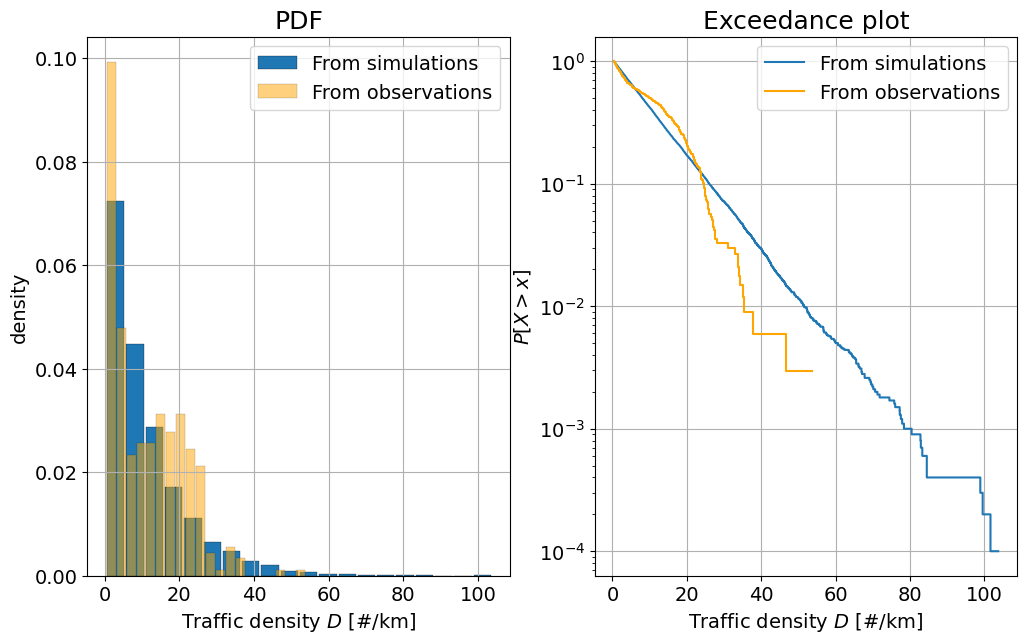

In [12]:
# Draw random samples
rs_F = stats.expon.rvs(*params_F, size = 10000)
rs_v = stats.gumbel_l.rvs(*params_v, size = 10000)

# Truncate values
rs_v = np.maximum(rs_v,1)
v = np.maximum(v,1)

# Compute D
rs_D = rs_F / rs_v

# Repeat for observations
D = F / v

# Plot the PDF and the CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 7))
axes[0].hist(rs_D, edgecolor='k', linewidth=0.2, density = True, label = 'From simulations', bins = 20, rwidth = 0.9)
axes[0].hist(D, edgecolor='k', facecolor = 'orange', alpha = 0.5, linewidth=0.2, bins = 20, rwidth = 0.9,
             density = True, label = 'From observations')
axes[0].set_xlabel('Traffic density $D$ [#/km]')
axes[0].set_ylabel('density')
axes[0].set_title('PDF', fontsize=18)
axes[0].legend(loc = "upper right")
axes[0].grid()

axes[1].step(ecdf(rs_D)[1], 1-ecdf(rs_D)[0], label = 'From simulations')
axes[1].step(ecdf(D)[1], 1-ecdf(D)[0], color = 'orange', label = 'From observations')
axes[1].set_xlabel('Traffic density $D$ [#/km]')
axes[1].set_ylabel('${P[X > x]}$')
axes[1].set_title('Exceedance plot', fontsize=18)
axes[1].set_yscale('log')
axes[1].legend(loc = "upper right")
axes[1].grid()

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 8:</b>   

Interpret the figures above, answering the following questions:
- Are there differences between the two computed distributions for the traffic density $D$?
- What are the advantages and disadvantages of using the simulations?
</p>
</div>

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- In the PDF plot, we can see that the computed traffic density does not fit the observed density very well. With the exception of a few outliers, the simulations tend to predict higher traffic densities than we observed, but underestimates the traffic density between 15 and 30 vehicles per km.
- <b>Disadvantages:</b> we are assuming that $F$ and $v$ are independent (we will see how to address this issue next week). But is that true? Since we have sampled $F$ and $v$ independently, there will be simulations where high traffic flow $F$ and high velocities $v$ coincide, resulting in perhaps unrealistically high simulated traffic densities. Also, the results are conditioned to how good of a model the selected parametric distribution is. In this case, since the exponential distribution performs poorly for $F$, the obtained distribution for $D$ also deviates from the one obtained from the observations. <b>Advantages:</b> I can draw all the samples I want allowing the computation of events I have not observed yet (extreme events).
</div>

If you run the code in the cell below, you will obtain a scatter plot of both variables. Explore the relationship between both variables and answer the following questions:

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 9:</b>   
    
1. Observe the plot below. What differences do you observe between the generated samples and the observations?
    
2. What can you improve into the previous analysis? Do you have any ideas/suggestions on how to implement those suggestions?
</p>
</div>

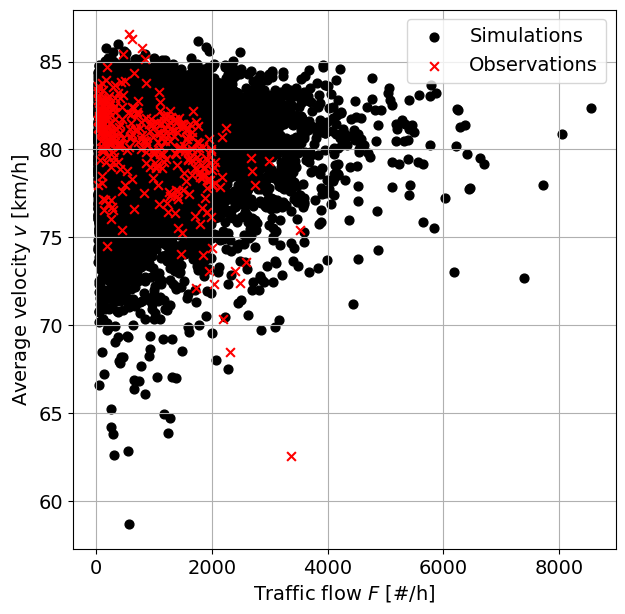

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
axes.scatter(rs_F, rs_v, 40, 'k', label = 'Simulations')
axes.scatter(F, v, 40, 'r', marker = 'x', label = 'Observations')
axes.set_xlabel('Traffic flow $F$ [#/h]')
axes.set_ylabel('Average velocity $v$ [km/h]')
axes.legend(loc = "upper right")
axes.grid()
plt.savefig("scatterplot.png",dpi=300)

<div style="background-color:#FAE99E; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
    <b>Solution:</b>

- The observations are focussed in a slightly curvy area of the plot, whereas the simulated values are spread more chaotically. This is because the observations are dependent due to a a practical relationship between the flow of traffic and the average velocity (intuitively, if the traffic flow becomes too large, the average velocities slow; we can observe this in the extremes), while the simulations are assumed to be independent. Moreover, we can see that negative numbers for the number of vehicles are sampled, which do not have a physical meaning. 
- <b>Some suggestions:</b> Improve the fit of $F$ with a mixture distribution. Account for the dependence between the two variables. 
</div>

> By Max Ramgraber, Patricia Mares Nasarre and Robert Lanzafame, Delft University of Technology. CC BY 4.0, more info [on the Credits page of Workbook](https://mude.citg.tudelft.nl/workbook-2025/credits.html).